In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz
!pip install heapdict
import networkx as nx

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgvc6-plugins-gtk libxdot4
The following NEW packages will be installed:
  libgraphviz-dev libgvc6-plugins-gtk libxdot4
0 upgraded, 3 newly installed, 0 to remove and 31 not upgraded.
Need to get 91.3 kB of archives.
After this operation, 425 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libxdot4 amd64 2.40.1-2 [15.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgvc6-plugins-gtk amd64 2.40.1-2 [18.2 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgraphviz-dev amd64 2.40.1-2 [57.3 kB]
Fetched 91.3 kB in 1s (111 kB/s)
Selecting previously unselected package libxdot4.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../libxdot4_2.40.1-2_amd64.deb ...
Unpacking libxdot4 (2.40.1-2) ...
Selecting pre

In [2]:
edges = "A B 4\nA C 1\nA E 6\nB C 2\nB D 5\nB F 6\nC D 4\n"\
        "D E 2\nD F 3\nE F 4"
with open("edges.txt", "w", encoding="utf8") as fout:
    fout.write(edges)

In [ ]:
def draw_graph(graph, fig):
    edge_color = [x.get("color", "black") for x in graph.edges.values()]
    pos = nx.nx_agraph.graphviz_layout(graph)
    labels = nx.get_edge_attributes(graph, "weight")
    nx.draw(graph, pos, with_labels=True, edge_color=edge_color)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    return
    # plt.axis("off")
    # # display(fig)

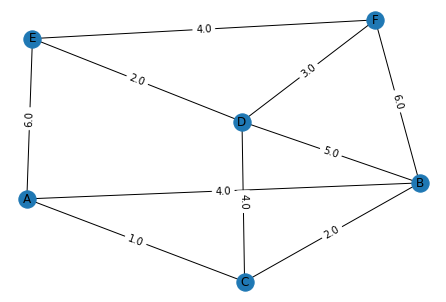

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

fig = plt.figure()
fig.clf()
graph = nx.read_weighted_edgelist("edges.txt")
draw_graph(graph, fig)
pass

In [ ]:
from heapdict import heapdict
from time import sleep

def prim_algorithm(graph: nx.Graph, to_draw=False):
    used, adjacent_edges = set(), heapdict()
    answer = []
    min_edge, min_weight = None, None
    for (first, second), edge in graph.edges.items():
        if min_edge is None or edge["weight"] < min_weight:
            min_edge, min_weight = (first, second), edge["weight"]
    used.add(min_edge[0])
    for other in graph[min_edge[0]]:
        adjacent_edges[(min_edge[0], other)] = graph.edges[(min_edge[0], other)]["weight"]
    if to_draw:
        draw_graph(graph, fig)
        sleep(5)
    else:
        print("Вершины:", used)
    while len(adjacent_edges) > 0:
        if to_draw:
            clear_output()
        (first, second), weight = adjacent_edges.popitem()
        edge = (first, second)
        if second in used:
            graph.edges[edge]["color"] = "blue"
            print("{} {} discarded".format(*edge))
            if to_draw:
                draw_graph(graph, fig)
            continue
        graph.edges[edge]["color"] = "red"
        answer.append(edge) 
        used.add(second)
        for other in graph[second]:
            if other not in used:
                adjacent_edges[(second, other)] = graph.edges[(second, other)]["weight"] 
        print("{} {} added".format(*edge))
        if to_draw:
            draw_graph(graph, fig)
            plt.pause(5)
        else:
            print("Вершины:", used)
            print("Рёбра", answer)
    return answer

D F discarded


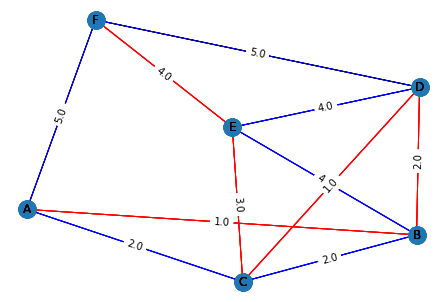

In [ ]:
%matplotlib inline
graph = nx.read_weighted_edgelist("edges.txt")
edges = prim_algorithm(graph, to_draw=True)
# draw_graph(graph);